In [2]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

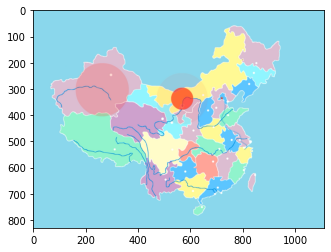

In [4]:
ori_img = cv2.imread('material/ChineseMap.jpg')
plt.imshow(ori_img[:, :, ::-1])


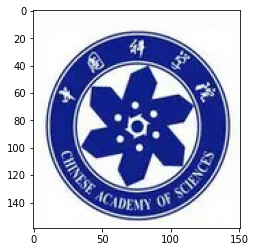

In [6]:
wm_img = cv2.imread('material/cas.png')
plt.imshow(wm_img[:, :, ::-1])

In [7]:
ori_img.shape

(830, 1111, 3)

In [11]:
height, width, _ = ori_img.shape

In [8]:
wm_img.shape

(159, 151, 3)

In [21]:
wm_height, wm_width, _ = wm_img.shape

## computer 2-d fft

In [9]:
ori_img_fft = np.fft.fft2(ori_img)

## create list

In [14]:
y_random_indices, x_random_indices = list(range(height)), list(range(width))

## reorder

In [19]:
random.shuffle(x_random_indices)
random.shuffle(y_random_indices)

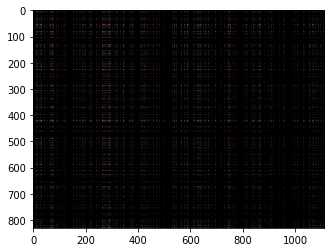

In [23]:
init_wm = np.zeros(ori_img.shape, dtype=np.uint8)

for y in range(wm_height):
    for x in range(wm_width):
        init_wm[y_random_indices[y], x_random_indices[x]] = wm_img[y, x]
plt.imshow(init_wm)

## generate result fft-img

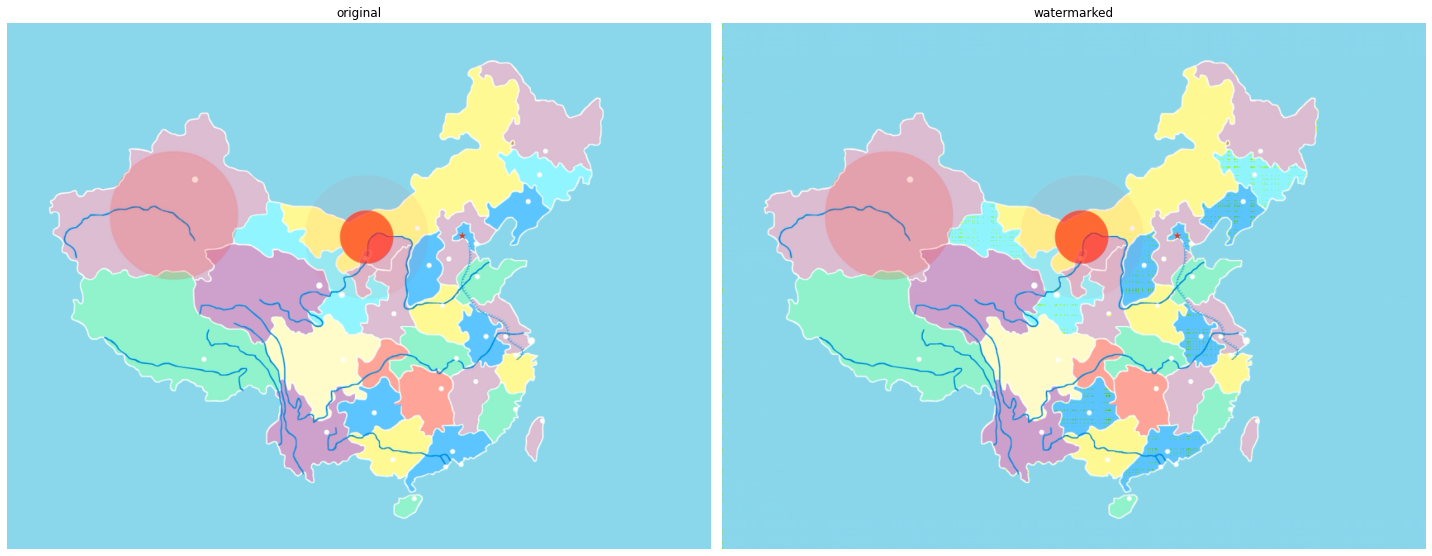

In [24]:
alpha = 5

result_fft = ori_img_fft + alpha * init_wm

result = np.fft.ifft2(result_fft)
result = np.real(result)
result = result.astype(np.uint8)

fig, axes = plt.subplots(1, 2, figsize=(20, 16))
axes[0].imshow(ori_img[:, :, ::-1])
axes[0].set_title('original')
axes[0].axis('off')
axes[1].imshow(result[:, :, ::-1])
axes[1].set_title('watermarked')
axes[1].axis('off')
fig.tight_layout()
plt.show()

## computer and plot difference between ori and watermarked

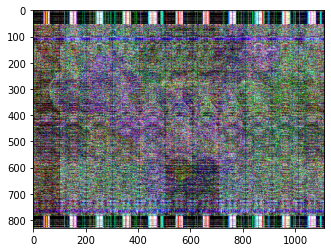

In [25]:
plt.imshow(result - ori_img)

# extract 

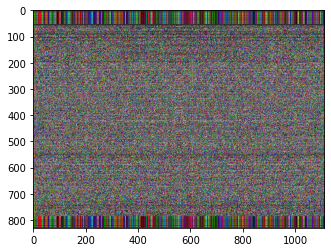

In [38]:
#transform img by fft
ori_fft = np.fft.fft2(ori_img)
wm_fft = np.fft.fft2(result)

watermark = (ori_fft - wm_fft) / alpha
watermark = np.real(watermark).astype(np.uint8)

plt.imshow(watermark)

In [39]:
y_random_indices, x_random_indices = list(range(height)), list(range(width))
random.shuffle(x_random_indices)
random.shuffle(y_random_indices)

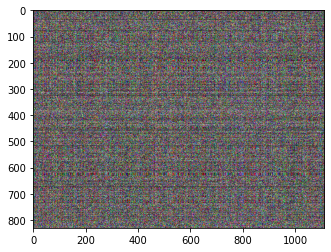

In [40]:
wm = np.zeros(watermark.shape, dtype=np.uint8)

for y in range(height):
    for x in range(width):
        wm[y, x] = watermark[y_random_indices[y], x_random_indices[x]]

plt.imshow(wm)

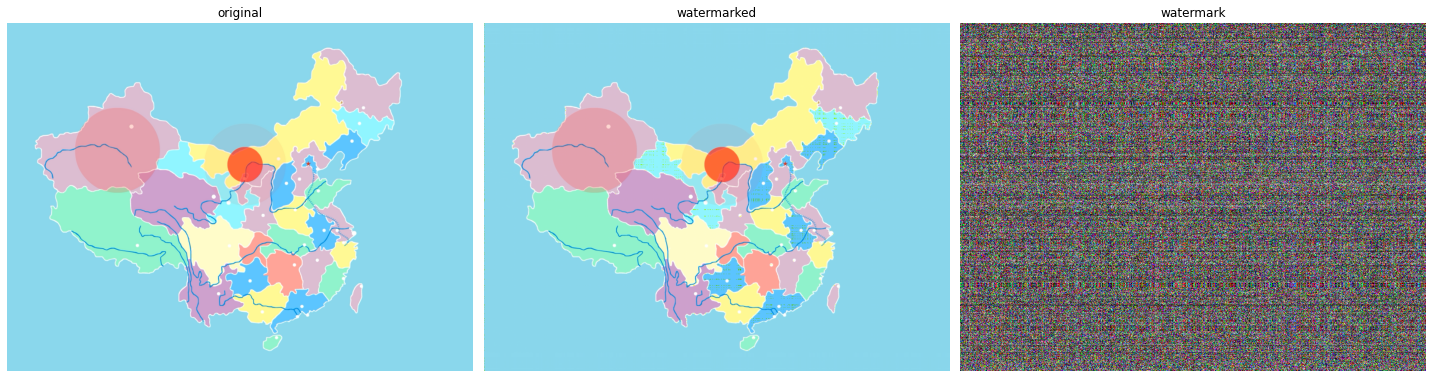

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(20, 16))
axes[0].imshow(ori_img[:, :, ::-1])
axes[0].set_title('original')
axes[0].axis('off')
axes[1].imshow(result[:, :, ::-1])
axes[1].set_title('watermarked')
axes[1].axis('off')
axes[2].imshow(wm)
axes[2].set_title('watermark')
axes[2].axis('off')
fig.tight_layout()
plt.show()